In [353]:
import pandas as pd

data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [354]:
def filter_pets(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None,
                vaccinated=None,health=None,prev=None):
    """
    Filter the pets DataFrame based on specified criteria.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing pet data.
    pet_type (str): The type of pet to filter by.
    breed (str): The breed of the pet to filter by.
    max_age_months (int): The maximum age of the pet in months to filter by (pets younger than this age).
    color (str): The color of the pet to filter by. ('white', 'black', 'orange')
    size (str): The size of the pet to filter by. ('small', 'medium', 'large')
    
    Returns:
    pd.DataFrame: A DataFrame filtered by the specified criteria.
    pd.DataFrame: A complementary DataFrame with pets that do not match the criteria.
    """
    
    df_filtered = df
    df_complementary = df
    
    # Filter by pet type if specified
    if pet_type:
        df_filtered = df_filtered[df_filtered['PetType'] == pet_type]
        df_complementary = df_complementary[df_complementary['PetType'] == pet_type]
        
    # Apply filters to get the main subset
    if breed:
        df_filtered = df_filtered[df_filtered['Breed'] == breed]
    if max_age_months is not None:
        df_filtered = df_filtered[df_filtered['AgeMonths'] < max_age_months]
    if color:
        df_filtered = df_filtered[df_filtered['Color'] == color]

    if adopted:
        df_filtered = df_filtered[df_filtered['AdoptionLikelihood'] == adopted]
        df_complementary = df_complementary[df_complementary['AdoptionLikelihood'] == adopted]
    if size:
        df_filtered = df_filtered[df_filtered['Size'] == size]
    if vaccinated:
        df_filtered = df_filtered[df_filtered['Vaccinated'] == vaccinated]
    if health:
        df_filtered = df_filtered[df_filtered['HealthCondition'] == health]
    if prev:
        df_filtered = df_filtered[df_filtered['PreviousOwner'] == prev]
    
    # Create the complementary subset by excluding the filtered results
    df_complementary = df_complementary[~df_complementary.index.isin(df_filtered.index)]
    
    return df_filtered, df_complementary

0.8506974694446651

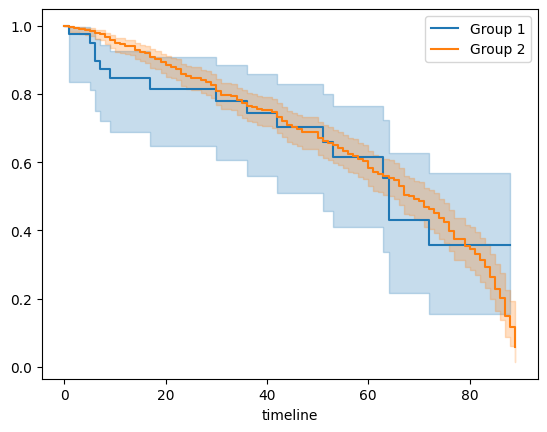

In [355]:
from lifelines.statistics import logrank_test
from lifelines.statistics import KaplanMeierFitter


group1,group2 = filter_pets(data_frame,pet_type='Dog',color='White',size='Small')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])

results.p_value

0.8794699767625658

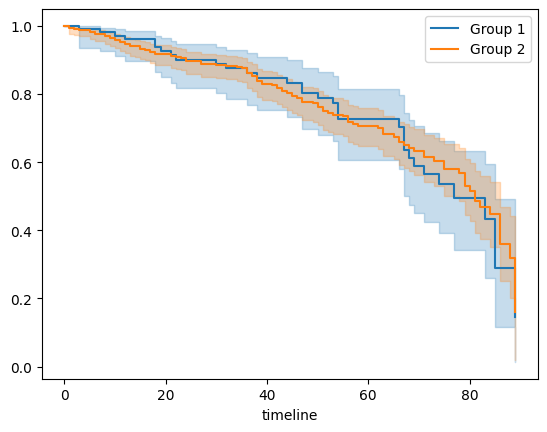

In [356]:
group1,group2 = filter_pets(data_frame,pet_type='Cat',color='Orange')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)
results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

9.106897756256654e-28

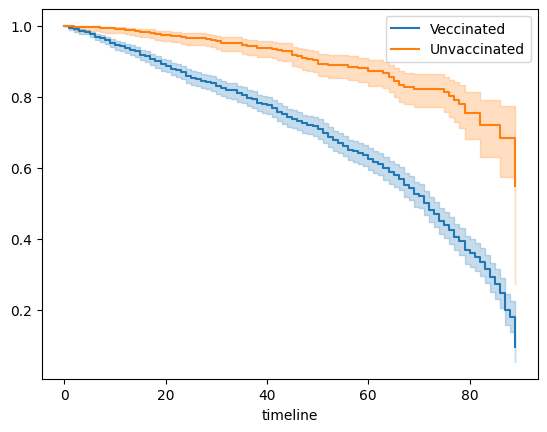

In [357]:
group1,group2 = filter_pets(data_frame,vaccinated=1)
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Veccinated')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Unvaccinated')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

1.1251042583268865e-18

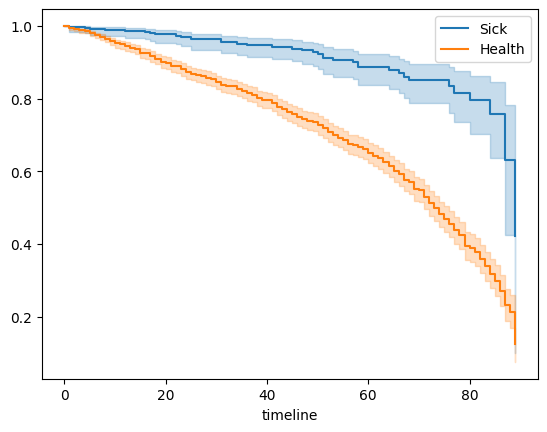

In [358]:
group1,group2 = filter_pets(data_frame,health=1)
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Sick')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Health')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

In [359]:
group1,group2 = filter_pets(data_frame,prev=1)
results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

0.27550022668945384

4.374140291524971e-05

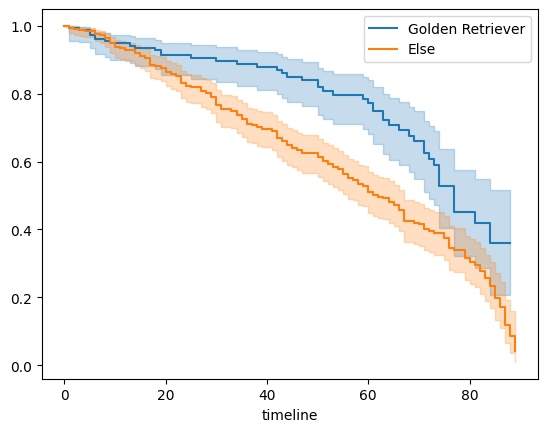

In [360]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Golden Retriever')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Golden Retriever')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Else')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

0.017762884735977

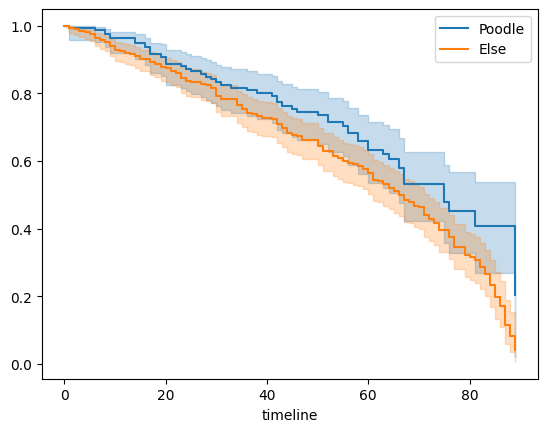

In [361]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Poodle')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Poodle')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Else')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

7.190073294920748e-10

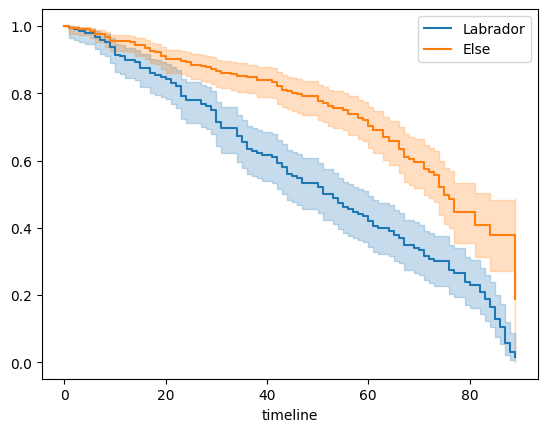

In [362]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Labrador')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Labrador')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Else')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

now lets do log rank.

In [363]:
def create_dataset_with_groups(data):
    colors = ['Black', 'Brown', 'Gray', 'Orange', 'White']
    sizes = ['Small', 'Medium', 'Large']
    types = ['Dog','Cat','Bird','Rabbit']

    # Create a mapping of combinations to group numbers
    group_mapping = {}
    group_number = 1
    for type in types:
        for color in colors:
            for size in sizes:
                combination_name = f'{color} and {size} of {type}'
                group_mapping[combination_name] = group_number
                group_number += 1
    
    # Create the groups column
    data['groups'] = None
    
    for type in types:
        for color in colors:
            for size in sizes:
                combination_name = f'{color} and {size} of {type}'
                group_number = group_mapping[combination_name]
                data.loc[(data['Color'] == f'{color}') & (data['Size'] == f'{size}')& (data['PetType'] == f'{type}'), 'groups'] = group_number
    
    # Create the new dataframe with required columns
    new_df = pd.DataFrame({
        'durations': data['TimeInShelterDays'],
        'groups': data['groups'],
        'events': data['AdoptionLikelihood']
    })
    
    return new_df, group_mapping

In [364]:

df_multy, mapping = create_dataset_with_groups(data_frame)
df_multy

,durations,groups,events
0,27,42,0
1,8,60,0
2,85,11,0
3,61,43,0
4,28,54,0
...,...,...,...
2002,66,10,1
2003,59,49,0
2004,68,55,0
2005,59,9,0


In [365]:
from lifelines.statistics import multivariate_logrank_test



result = multivariate_logrank_test(df_multy['durations'], df_multy['groups'], df_multy['events'])
result.test_statistic
result.p_value

1.878100329625239e-49

now we saw that there is a change. lets rank eache grop with its mean and then performe log rank

In [366]:
import numpy as np
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

def rank_df(new_df):
    
    ranked = []

    for group in new_df['groups'].unique():
        ranked.append((group , np.mean(new_df[new_df['groups'] == group]['durations'])))

    ranked = sorted(ranked, key=lambda x: x[1])

    return ranked


In [367]:
ranks = rank_df(df_multy)
ranks

[(45, 32.42857142857143),
 (42, 33.73684210526316),
 (23, 33.878787878787875),
 (24, 34.074074074074076),
 (31, 36.542857142857144),
 (13, 37.775),
 (15, 37.97560975609756),
 (44, 39.08571428571429),
 (22, 39.26923076923077),
 (27, 39.48148148148148),
 (37, 39.58620689655172),
 (8, 39.851063829787236),
 (60, 40.09756097560975),
 (17, 41.282051282051285),
 (20, 41.74193548387097),
 (50, 41.91428571428571),
 (36, 41.96774193548387),
 (58, 42.095238095238095),
 (59, 42.111111111111114),
 (12, 42.25714285714286),
 (25, 42.63157894736842),
 (6, 42.758620689655174),
 (35, 42.93333333333333),
 (11, 43.13793103448276),
 (51, 43.32),
 (18, 43.35897435897436),
 (4, 43.44827586206897),
 (16, 43.5),
 (30, 43.516129032258064),
 (40, 43.55172413793103),
 (57, 43.84),
 (14, 43.90625),
 (53, 44.58536585365854),
 (29, 44.89473684210526),
 (3, 44.90625),
 (55, 45.10344827586207),
 (10, 45.64705882352941),
 (33, 45.73913043478261),
 (32, 46.0),
 (49, 46.044444444444444),
 (47, 46.25),
 (5, 46.51612903225

In [368]:
from lifelines.statistics import logrank_test

def calculate_p_values(ranks,df):
    p_values = []
    classes = []
    
    for i in range(len(ranks) - 1):
        T1 = df[df['groups'] == ranks[i][0]]['durations'].tolist()
        E1 = df[df['groups'] == ranks[i][0]]['events'].tolist()
        T2 = df[df['groups'] == ranks[i+1][0]]['durations'].tolist()
        E2 = df[df['groups'] == ranks[i+1][0]]['events'].tolist()

        results = logrank_test(T1, T2, E1, E2)
        p_values.append(results.p_value)
        classes.append((ranks[i][0],ranks[i+1][0]))
    
    return p_values,classes

p_vals,classes = calculate_p_values(ranks,df_multy)
print(len(p_vals),len(ranks))

59 60


In [369]:
from statsmodels.stats.multitest import fdrcorrection
correct,_ = fdrcorrection(p_vals, alpha=0.05)
clusters = []
current_cluster = [get_key_by_value(mapping,classes[0][0])]

for i in range(len(correct)):
    if correct[i] == True:
        clusters.append(current_cluster)
        current_cluster = [get_key_by_value(mapping,classes[i][1])]
    else:
        current_cluster.append(get_key_by_value(mapping,classes[i][1]))
print(clusters)

[['White and Large of Bird', 'Orange and Large of Bird'], ['Gray and Medium of Cat'], ['Gray and Large of Cat', 'Black and Small of Bird', 'White and Small of Dog', 'White and Large of Dog'], ['White and Medium of Bird'], ['Gray and Small of Cat', 'Orange and Large of Cat', 'Gray and Small of Bird'], ['Gray and Medium of Dog'], ['White and Large of Rabbit'], ['Black and Medium of Cat', 'Brown and Medium of Cat', 'Brown and Medium of Rabbit'], ['Brown and Large of Bird', 'White and Small of Rabbit', 'White and Medium of Rabbit', 'Orange and Large of Dog', 'Orange and Small of Cat', 'Brown and Large of Dog', 'Brown and Medium of Bird', 'Orange and Medium of Dog'], ['Brown and Large of Rabbit', 'Black and Large of Cat', 'Brown and Small of Dog', 'Black and Small of Cat', 'White and Large of Cat', 'Orange and Small of Bird', 'Orange and Large of Rabbit'], ['White and Medium of Dog', 'Gray and Medium of Rabbit', 'White and Medium of Cat'], ['Black and Large of Dog', 'Orange and Small of Rab

now lets try to do U-test instead of log rank to get some knowledge about the directions

In [370]:
df_multy_adopted = df_multy[df_multy['events'] == 1]

In [371]:
#stats.mannwhitneyu(np.array(pets[0]['TimeInShelterDays']),np.array(pets[1]['TimeInShelterDays']),alternative=direction)
from scipy import stats
def calculate_p_values_U(ranks,df):
    p_values = []
    for i in range(len(ranks) - 1):
        T1 = df[df['groups'] == ranks[i][0]]['durations'].tolist()
        T2 = df[df['groups'] == ranks[i+1][0]]['durations'].tolist()
        results = stats.mannwhitneyu(T1,T2,alternative='less')
        p_values.append(results.pvalue)

    return p_values
    
p_vals = calculate_p_values_U(ranks,df_multy_adopted)
print(fdrcorrection(p_vals, alpha=0.05))

(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]), array([0.9214998 , 0.9214998 , 0.9214998 , 0.9214998 , 0.9214998 ,
       0.91201449, 0.9214998 , 0.91201449, 0.95617349, 0.91201449,
       0.9214998 , 0.95617349, 0.87308981, 0.9214998 , 0.91201449,
       0.95617349, 0.70238095, 0.9214998 , 0.9214998 , 0.9214998 ,
       0.91201449, 0.95617349, 0.91201449, 0.9214998 , 0.9214998 ,
       0.9214998 , 0.87308981, 0.9214998 , 0.9214998 , 0.91201449,
       0.9214998 , 0.9214998 , 0.91201449, 0.9214998 , 0.91201449,
       0.9214998 , 0.91201449, 0.95617349, 0.9214998 , 0.9214998 ,